<a href="https://colab.research.google.com/github/carlosQuin964/TalentoTech_CarlosQ/blob/main/Copia_de_AnalisisSentimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# instala la libreria para traducir el lenguaje
!pip install googletrans==3.1.0a0
!pip install textblob

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=398d3237136244709ed51ec95081d03fbfe80db8f3660474bbc78f51a2584a2b
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succe

In [ ]:
import pandas as pd
from textblob import TextBlob
from googletrans import Translator

In [ ]:
# Carga el dataset para la lectura y el procesamiento de los comentarios
def translateComment(strComment:str):
    translator = Translator()
    strEngComment = translator.translate(strComment, src="es", dest="en")
    return strEngComment.text


def getPolarity(strComment:str):
    strComment = translateComment(strComment)
    analysis = TextBlob(strComment)
    return analysis.sentiment.polarity



# Cargamos el dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Encuesta.csv')
df['polaridad'] = df['Comentario'].apply(getPolarity)



df.to_csv('resultados.csv', index=False)



In [ ]:
# muestra los 10 primeros datos del dataframe
df.head(10)

,Comentario,polaridad
0,\tConsidero importante mejorar las pruebas de ...,0.027778
1,\tConsidero que Trial360 es un muy buen produc...,0.242963
2,\tDespués de las reuniones que se han sostenid...,0.375000
3,\tDetalles como Cambios no controlados durante...,-0.125000
4,\tEl personal es muy amable.\t,0.487500
5,\tEl sistema me parece super bueno y creo que ...,0.511111
6,\tEn terminos generales el PM siempre estuvo a...,0.139394
7,\tEs un riesgo con la calidad del producto (Tr...,0.325000
8,\tEverything OK\t,0.500000
9,\tExcelente herramienta y soporte.\t,1.000000


<Axes: >

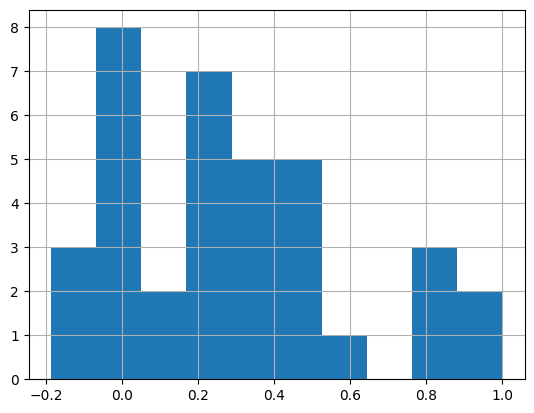

In [ ]:
# Histograma de la distribucion de polaridad de los comentarios
df['polaridad'].hist(bins=10)

In [ ]:
# prompt: Crea un grafico de pastel con la libreria plotly.graph_objects clasificando los comentarios como favorables y no favorables de acuerdo a la polaridad, polaridades negativas son comentarios no favorables y los positivos son favorables

import plotly.graph_objects as go

# Clasificar los comentarios
df['clasificacion'] = df['polaridad'].apply(lambda x: 'Favorable' if x > 0 else 'No favorable')

# Contar la cantidad de comentarios favorables y no favorables
counts = df['clasificacion'].value_counts()

# Crear el gráfico de pastel
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values)])

# Personalizar el gráfico
fig.update_layout(title='Clasificación de Comentarios')

# Mostrar el gráfico
fig.show()

In [ ]:
# prompt: imprime el comentario con el puntaje menor y el comentario con el puntaje mayor, el menos como comentario mas negativo y el mejor como comentario mas positivo

import pandas as pd

# Cargamos el dataset (asumiendo que 'resultados.csv' existe)
df = pd.read_csv('resultados.csv')

# Encuentra el comentario más negativo (menor polaridad)
min_polarity_comment = df.loc[df['polaridad'].idxmin()]
min_polarity_comment2 = df.loc[df['polaridad'].idxmin()-2]

# Encuentra el comentario más positivo (mayor polaridad)
max_polarity_comment = df.loc[df['polaridad'].idxmax()]

print("Comentario más negativo:")
print(f"Puntaje: {min_polarity_comment['polaridad']}")
print(f"Comentario: {min_polarity_comment['Comentario']}\n")

print(f"Puntaje: {min_polarity_comment2['polaridad']}")
print(f"Comentario: {min_polarity_comment2['Comentario']}\n")

print("Comentario más positivo:")
print(f"Puntaje: {max_polarity_comment['polaridad']}")
print(f"Comentario: {max_polarity_comment['Comentario']}")

Comentario más negativo:
Puntaje: -0.1875
Comentario: 	Mejorar un poco en tiempos de resolucion de incidentes en el sistema	

Puntaje: 0.25
Comentario: 	Las instrucciones y/o manuales de uso deben ser mas claros y presentar muchos mas detalles de la plataforma visual y sistemas.	

Comentario más positivo:
Puntaje: 1.0
Comentario: 	Excelente herramienta y soporte.	
